1: Read first seven columns from CSV file

In [ ]:
import csv
with open('imu.log', 'r') as csvfile:
  for line in csvfile:
    columns = line.strip().split(',')[:7]
    print(columns)

2: Separate accelerometer and gyroscope values into distinct NumPy Arrays: accX, accY, accZ, gyroX, gyroY, gyroZ.

In [ ]:
import numpy

accX = []
accY = []
accZ = []
gyroX = []
gyroY = []
gyroZ = []

with open('imu.log', 'r') as csvfile:
    next(csvfile) #to skip the headers
    for line in csvfile:
        columns = line.strip().split(',')[:7]

        accX.append(float(columns[4]))
        accY.append(float(columns[5]))
        accZ.append(float(columns[6]))
        gyroX.append(float(columns[1]))
        gyroY.append(float(columns[2]))
        gyroZ.append(float(columns[3]))

accX = numpy.array(accX)
accY = numpy.array(accY)
accZ = numpy.array(accZ)
gyroX = numpy.array(gyroX)
gyroY = numpy.array(gyroY)
gyroZ = numpy.array(gyroZ)

ALTERNATIVE: using pandas library, as taught in AI1 by Prof. Mostofi

removes need of step 1 and using "with" method, executes in much lower lines of code

In [ ]:
import pandas as pd


df = pd.read_csv('imu.log')

accX = df['Accelerometer X (g)'].to_numpy()
accY = df['Accelerometer Y (g)'].to_numpy()
accZ = df['Accelerometer Z (g)'].to_numpy()
gyroX = df['Gyroscope X (deg/s)'].to_numpy()
gyroY = df['Gyroscope Y (deg/s)'].to_numpy()
gyroZ = df['Gyroscope Z (deg/s)'].to_numpy()


print(accX)
print(accY)
print(accZ)
print(gyroX)
print(gyroY)
print(gyroZ)

3: Convert gyroscope units from degrees per second (deg/s) to radians per second (rad/s).

In [ ]:
gyroX = numpy.radians(gyroX)
gyroY = numpy.radians(gyroY)
gyroZ = numpy.radians(gyroZ)

4: Convert accelerometer units from gravitational force (g) to meters per square seconds (m/s2).

In [ ]:
accX = accX*9.81
accY = accY*9.81
accZ = accZ*9.81

5: Calculate the magnitude for the accelerometer as a new variable acc.

In [ ]:
acc = numpy.sqrt(accX**2 + accY**2 + accZ**2)

6: Create an additional NumPy Array for timestamps starting from 10:00:00. Ensure the length of timestamps and acc is the same.

In [ ]:
from datetime import datetime, timedelta

freq=100
start_time = datetime.strptime('10:00:00', '%H:%M:%S')
timestamps = numpy.array([start_time + timedelta(seconds=i/freq) for i in range(len(acc))])

7: Smooth the accelerometer magnitude (acc) using a moving average filter with a window size of 10.
Store the filtered data in a new variable acc_smooth.

In [ ]:
window_size = 10
acc_smooth = numpy.convolve(acc, numpy.ones(window_size)/window_size, mode='same')

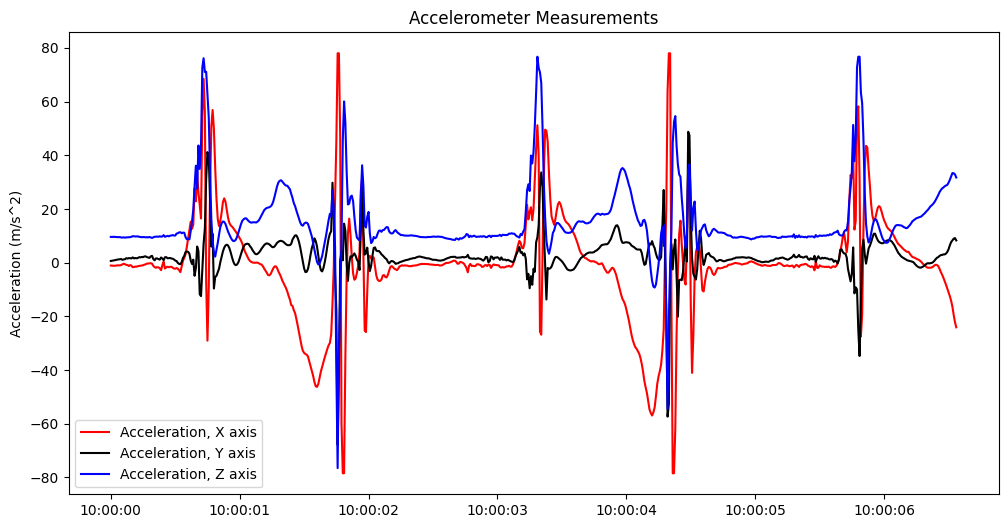

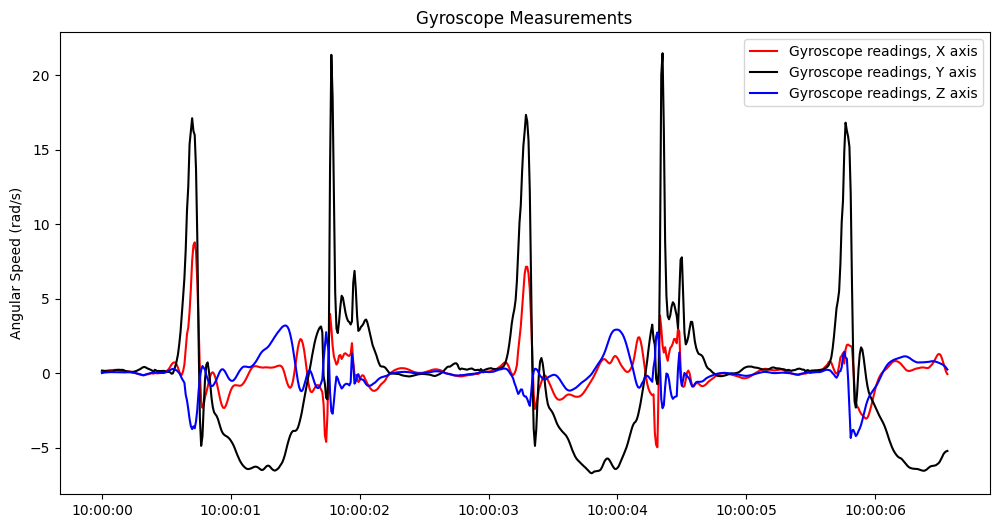

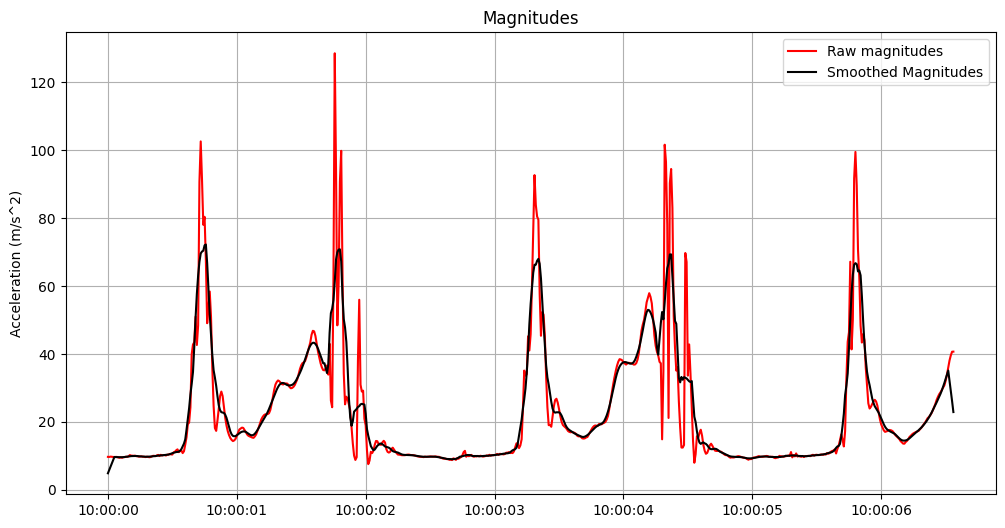

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as md

fig1, ax1 = plt.subplots(figsize=(12, 6))  # Accelerometer
fig2, ax2 = plt.subplots(figsize=(12, 6))  # Gyroscope
fig3, ax3 = plt.subplots(figsize=(12, 6))  # Magnitude

ax1.plot(timestamps, accX, color="#FF0000", label="Acceleration, X axis")
ax1.plot(timestamps, accY, color="#000000", label="Acceleration, Y axis")
ax1.plot(timestamps, accZ, color="#0000FF", label="Acceleration, Z axis")
ax1.set_ylabel('Acceleration (m/s^2)')
ax1.set_title('Accelerometer Measurements')
ax1.legend()

ax2.plot(timestamps, gyroX, color="#FF0000", label="Gyroscope readings, X axis")
ax2.plot(timestamps, gyroY, color="#000000", label="Gyroscope readings, Y axis")
ax2.plot(timestamps, gyroZ, color="#0000FF", label="Gyroscope readings, Z axis")
ax2.set_ylabel('Angular Speed (rad/s)')
ax2.set_title('Gyroscope Measurements')
ax2.legend()

ax3.plot(timestamps, acc, color="#FF0000", label='Raw magnitudes')
ax3.plot(timestamps, acc_smooth, color="#000000", label='Smoothed Magnitudes')
ax3.set_ylabel('Acceleration (m/s^2)')
ax3.set_title('Magnitudes')
ax3.legend()

# Formatting x-axis
for ax in [ax1, ax2, ax3]:
    ax.xaxis.set_major_formatter(md.DateFormatter("%H:%M:%S"))

plt.grid()
plt.legend()
plt.show()